In [1]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [2]:
from matplotlib_venn import venn2

/home/olgan96/.env/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
from upsetplot import plot

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Cells

In [7]:
df_lincs = pd.read_parquet('../../NO_BACKUP/lincs_2020/signature_response_features_r2_top0.7_final.parquet')

In [8]:
df_tahoe = pd.read_parquet('../../NO_BACKUP/tahoe/final_tahoe_no_overlappings.parquet')

In [9]:
df_lcellinfo = pd.read_parquet('../../NO_BACKUP/lincs_2020/cell_info.parquet')
df_lcellinfo = df_lcellinfo.drop_duplicates(subset=['cellosaurus_id'])[['cellosaurus_id', 'cell_iname']]

In [10]:
df_tcellinfo = pd.read_parquet('../../NO_BACKUP/tahoe/cell_line_info.parquet')
df_tcellinfo = df_tcellinfo[['cell_name', 'Cell_ID_Cellosaur']].drop_duplicates('Cell_ID_Cellosaur').rename(columns={'Cell_ID_Cellosaur': 'cell_line'})

In [11]:
df_lcell_cnt = pd.DataFrame(df_lincs['cellosaurus_id'].value_counts()).reset_index()

In [12]:
df_tcell_cnt = pd.DataFrame(df_tahoe[['cell_line']].value_counts()).reset_index()

In [13]:
df_lcell_cnt = df_lcell_cnt.merge(df_lcellinfo, on='cellosaurus_id', how='left')

In [14]:
df_tcell_cnt = df_tcell_cnt.merge(df_tcellinfo, on='cell_line', how='left')

In [15]:
df_lcell_cnt['cell_name | cellosaurus_id'] = df_lcell_cnt['cell_iname'] + ' | ' + df_lcell_cnt['cellosaurus_id']

In [16]:
df_tcell_cnt['cell_name | cellosaurus_id'] = df_tcell_cnt['cell_name'] + ' | ' + df_tcell_cnt['cell_line']

In [17]:
df_lcell_cnt['dataset'] = 'LINCS L1000'

In [18]:
df_tcell_cnt['dataset'] = 'Tahoe'

In [19]:
df_cells_top20 = pd.concat([df_lcell_cnt[['cell_name | cellosaurus_id', 'count', 'dataset']][:20], df_tcell_cnt[['cell_name | cellosaurus_id', 'count', 'dataset']][:20]])

Text(0.5, 0.98, 'top20')

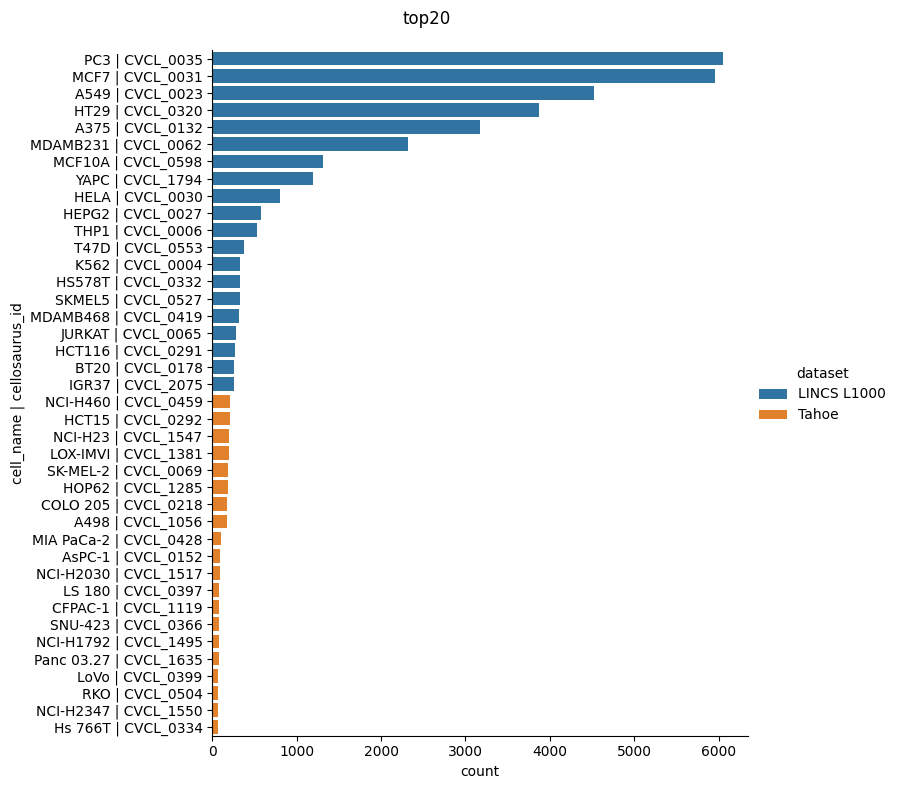

In [20]:
#sns.set_theme(rc={'figure.figsize':(100, 40)})
plot = sns.catplot(df_cells_top20, kind="bar", x="count", y="cell_name | cellosaurus_id", orient="y", hue='dataset', legend=True, height=8)
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('top20')

In [21]:
df_cells_low20 = pd.concat([df_lcell_cnt[['cell_name | cellosaurus_id', 'count', 'dataset']][-20:], df_tcell_cnt[['cell_name | cellosaurus_id', 'count', 'dataset']][-20:]])

Text(0.5, 0.98, 'low20')

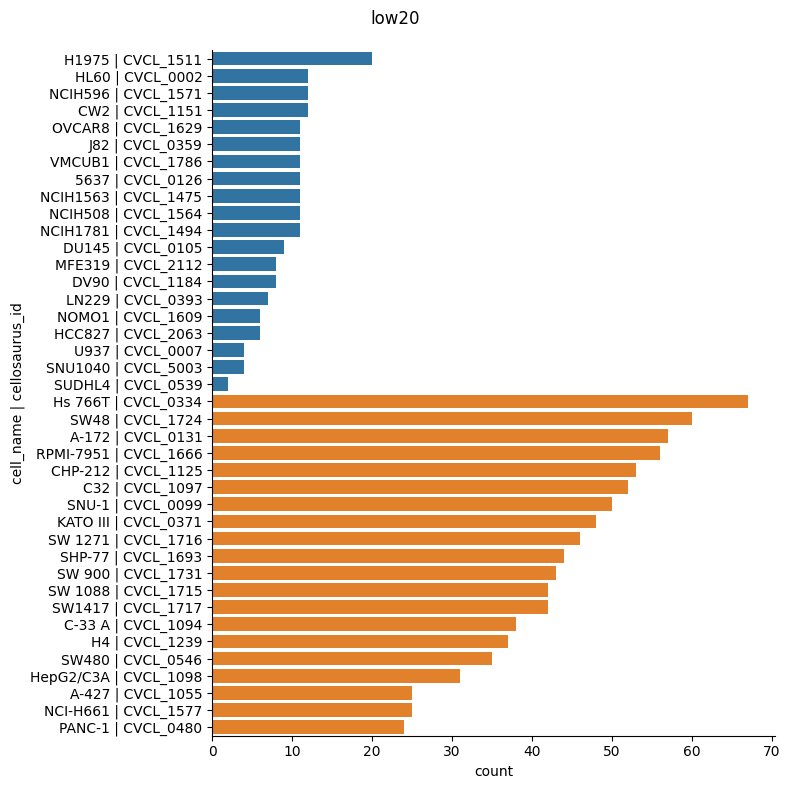

In [22]:
#sns.set_theme(rc={'figure.figsize':(100, 40)})
plot = sns.catplot(df_cells_low20, kind="bar", x="count", y="cell_name | cellosaurus_id", orient="y", hue='dataset', legend=False, height=8)
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('low20')

In [23]:
df_lcell_cnt_ = df_lcell_cnt.copy()
df_tcell_cnt_ = df_tcell_cnt.copy()

df_lcell_cnt_['count'] = df_lcell_cnt_['count']/df_lcell_cnt_['count'].sum()
df_tcell_cnt_['count'] = df_tcell_cnt_['count']/df_tcell_cnt_['count'].sum()

df_cells_top20_ = pd.concat([df_lcell_cnt_[['cell_name | cellosaurus_id', 'count', 'dataset']][:20], df_tcell_cnt_[['cell_name | cellosaurus_id', 'count', 'dataset']][:20]])
df_cells_low20_ = pd.concat([df_lcell_cnt_[['cell_name | cellosaurus_id', 'count', 'dataset']][-20:], df_tcell_cnt_[['cell_name | cellosaurus_id', 'count', 'dataset']][-20:]])

df_cells_top20_ = df_cells_top20_.rename(columns={'count': 'fraction'})
df_cells_low20_ = df_cells_low20_.rename(columns={'count': 'fraction'})



Text(0.5, 0.98, 'top20 normalized')

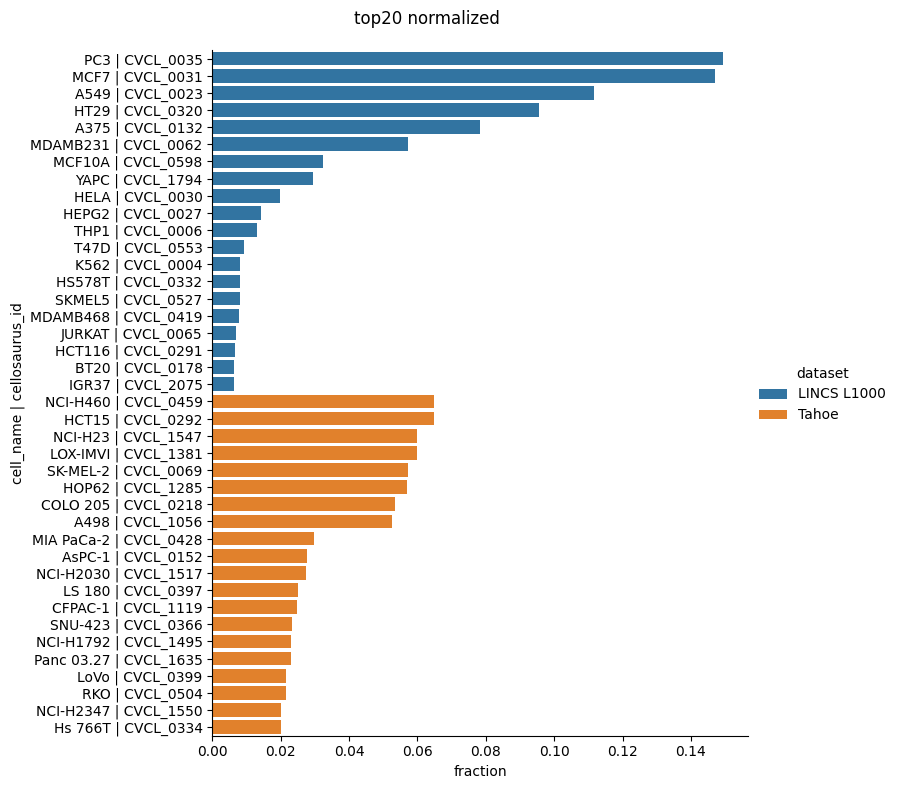

In [24]:
#sns.set_theme(rc={'figure.figsize':(100, 40)})
plot = sns.catplot(df_cells_top20_, kind="bar", x="fraction", y="cell_name | cellosaurus_id", orient="y", hue='dataset', legend=True, height=8)
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('top20 normalized')

Text(0.5, 0.98, 'low20 normalized')

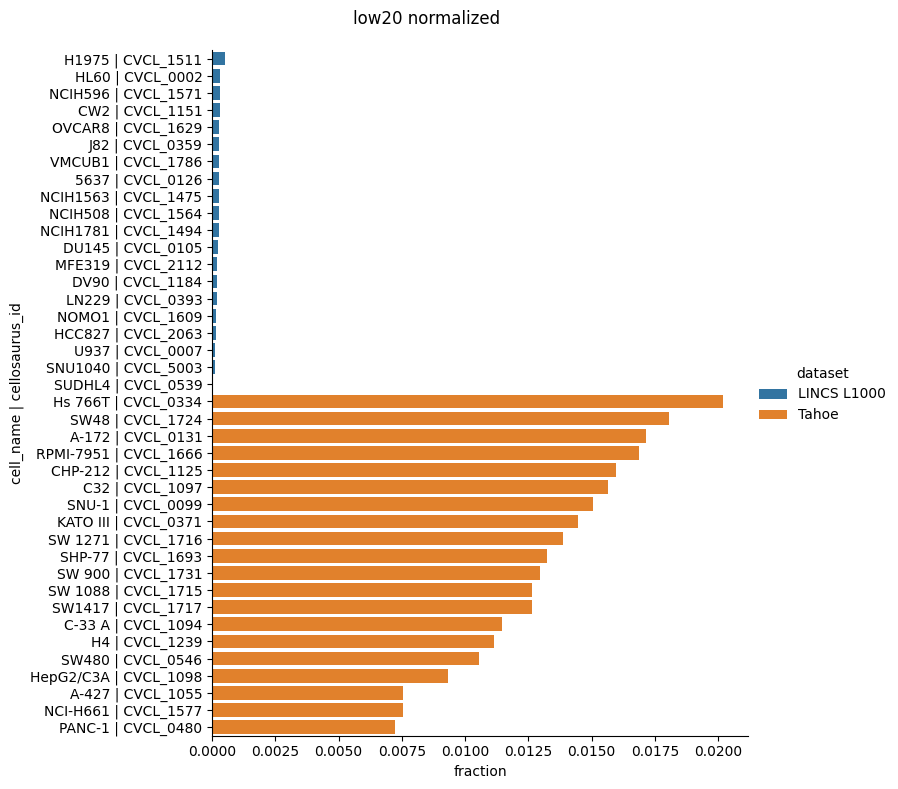

In [25]:
#sns.set_theme(rc={'figure.figsize':(100, 40)})
plot = sns.catplot(df_cells_low20_, kind="bar", x="fraction", y="cell_name | cellosaurus_id", orient="y", hue='dataset', legend=True, height=8)
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('low20 normalized')

In [26]:
df_cell_cnt = pd.concat([df_lcell_cnt[['dataset', 'count']], df_tcell_cnt[['dataset', 'count']]])

Text(0.5, 0.98, 'number of cells')

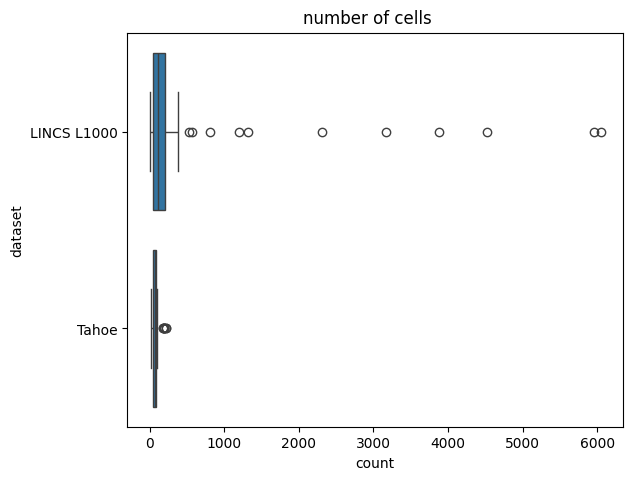

In [27]:
plot = sns.boxplot(data=df_cell_cnt, x="count", y="dataset")
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('number of cells')

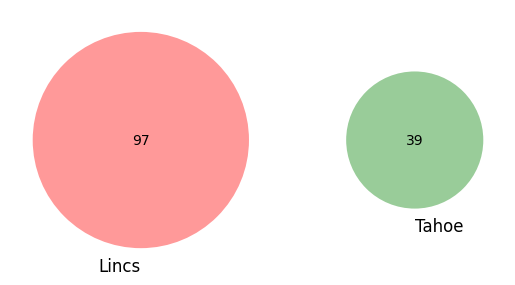

In [28]:
set_l = set(df_lcell_cnt['cellosaurus_id'])
set_t = set(df_tcell_cnt['cell_line'])

venn2([set_l, set_t], ('Lincs', 'Tahoe'))
plt.show()

## Drugs

In [29]:
df_ldrug_cnt = pd.DataFrame(df_lincs['cmap_name'].value_counts()).reset_index().rename(columns={'cmap_name': 'drug_name'})

In [30]:
df_tdrug_cnt = pd.DataFrame(df_tahoe['drug'].value_counts()).reset_index().rename(columns={'drug': 'drug_name'})

In [31]:
df_ldrug_cnt['dataset'] = 'LINCS L1000'

In [32]:
df_tdrug_cnt['dataset'] = 'Tahoe'

In [33]:
df_drug_top20 = pd.concat([df_ldrug_cnt[['drug_name', 'count', 'dataset']][:20], df_tdrug_cnt[['drug_name', 'count', 'dataset']][:20]])

In [34]:
df_drug_low20 = pd.concat([df_ldrug_cnt[['drug_name', 'count', 'dataset']][-20:], df_tdrug_cnt[['drug_name', 'count', 'dataset']][-20:]])

Text(0.5, 0.98, 'top20')

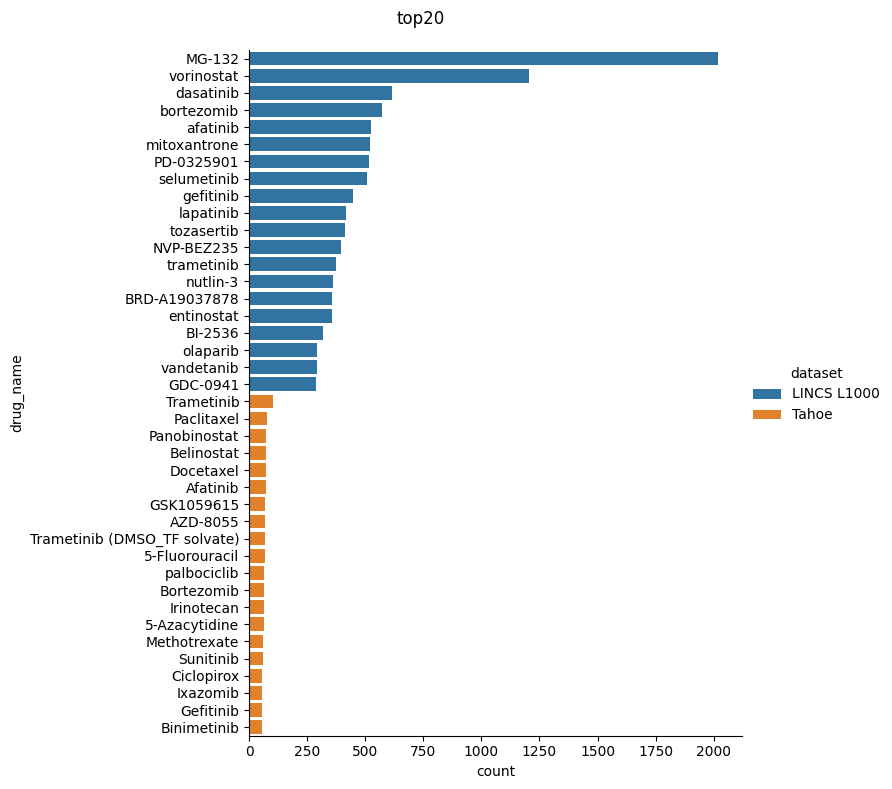

In [35]:
#sns.set_theme(rc={'figure.figsize':(100, 40)})
plot = sns.catplot(df_drug_top20, kind="bar", x="count", y="drug_name", orient="y", hue='dataset', legend=True, height=8)
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('top20')

Text(0.5, 0.98, 'top20')

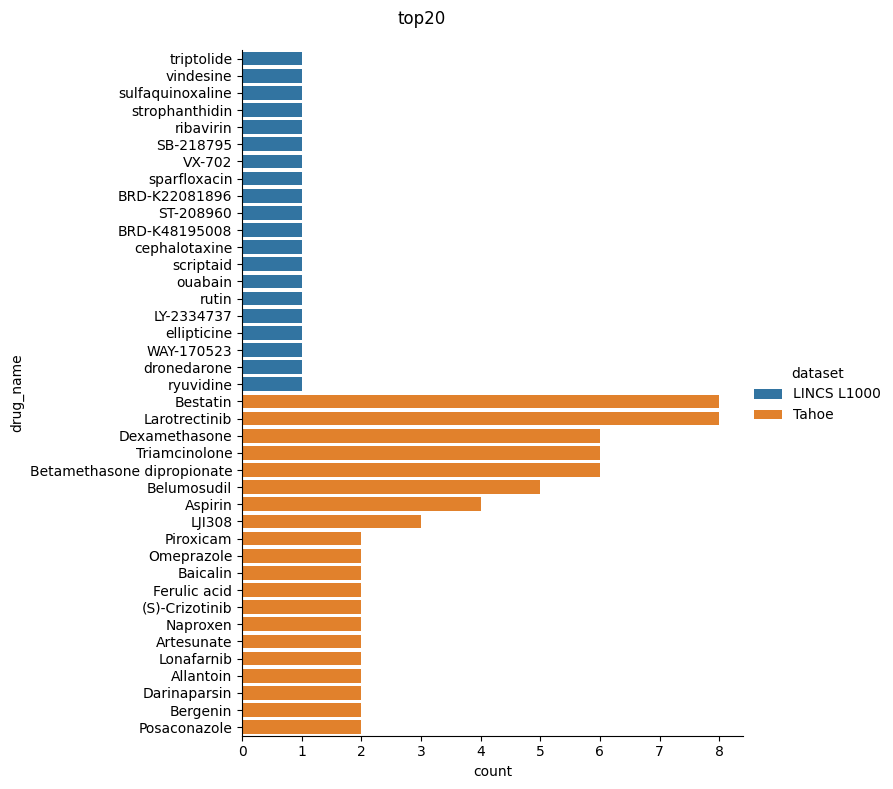

In [36]:
#sns.set_theme(rc={'figure.figsize':(100, 40)})
plot = sns.catplot(df_drug_low20, kind="bar", x="count", y="drug_name", orient="y", hue='dataset', legend=True, height=8)
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('top20')

In [37]:
df_ldrug_cnt_ = df_ldrug_cnt.copy()
df_tdrug_cnt_ = df_tdrug_cnt.copy()

df_ldrug_cnt_['count'] = df_ldrug_cnt_['count']/df_ldrug_cnt_['count'].sum()
df_tdrug_cnt_['count'] = df_tdrug_cnt_['count']/df_tdrug_cnt_['count'].sum()

df_drug_top20_ = pd.concat([df_ldrug_cnt_[['drug_name', 'count', 'dataset']][:20], df_tdrug_cnt_[['drug_name', 'count', 'dataset']][:20]])
df_drug_low20_ = pd.concat([df_ldrug_cnt_[['drug_name', 'count', 'dataset']][-20:], df_tdrug_cnt_[['drug_name', 'count', 'dataset']][-20:]])

df_drug_top20_ = df_drug_top20_.rename(columns={'count': 'fraction'})
df_drug_low20_ = df_drug_low20_.rename(columns={'count': 'fraction'})

Text(0.5, 0.98, 'low20 normalized')

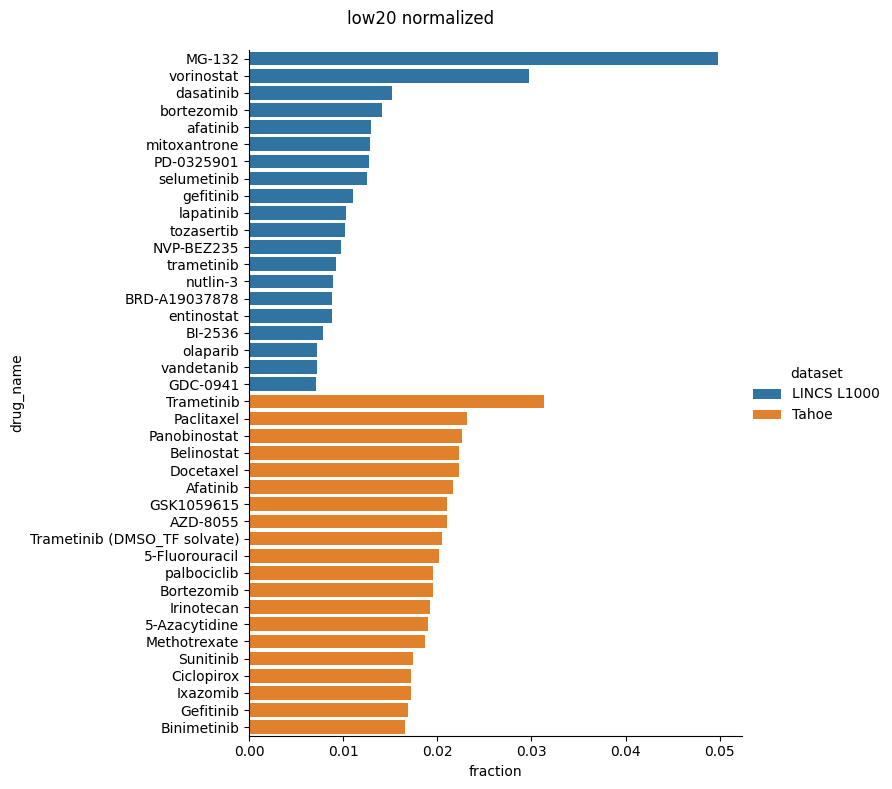

In [38]:
#sns.set_theme(rc={'figure.figsize':(100, 40)})
plot = sns.catplot(df_drug_top20_, kind="bar", x="fraction", y="drug_name", orient="y", hue='dataset', legend=True, height=8)
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('low20 normalized')

Text(0.5, 0.98, 'low20 normalized')

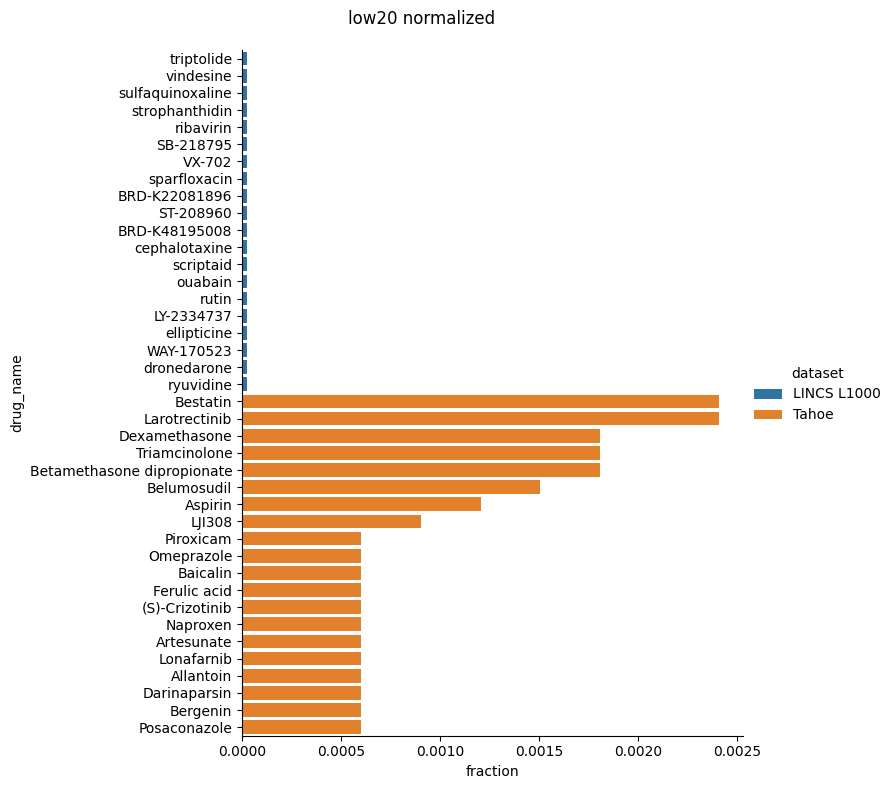

In [39]:
#sns.set_theme(rc={'figure.figsize':(100, 40)})
plot = sns.catplot(df_drug_low20_, kind="bar", x="fraction", y="drug_name", orient="y", hue='dataset', legend=True, height=8)
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('low20 normalized')

In [40]:
df_drug_cnt = pd.concat([df_ldrug_cnt[['dataset', 'count']], df_tdrug_cnt[['dataset', 'count']]])

Text(0.5, 0.98, 'number of drugs')

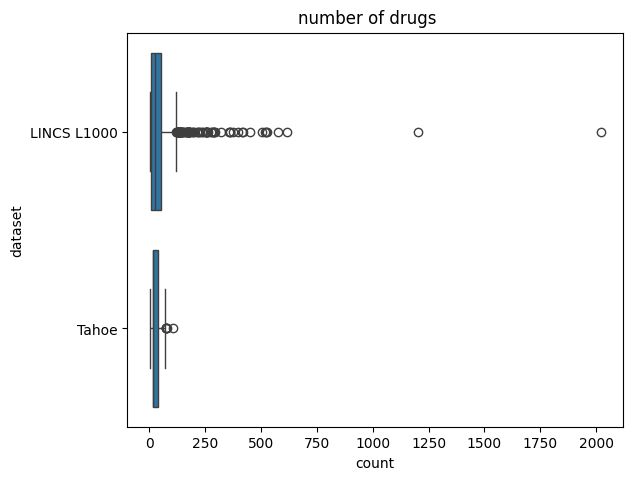

In [41]:
plot = sns.boxplot(data=df_drug_cnt, x="count", y="dataset")
plot.figure.subplots_adjust(top=0.93);
plot.figure.suptitle('number of drugs')

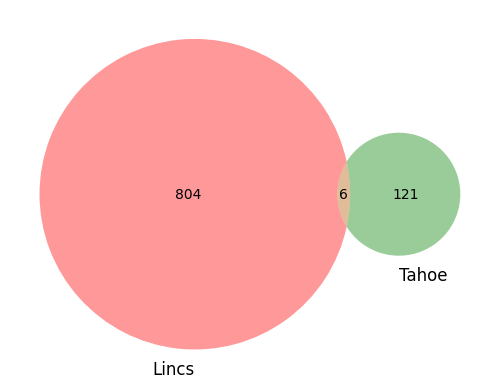

In [42]:
set_l = set(df_ldrug_cnt['drug_name'])
set_t = set(df_tdrug_cnt['drug_name'])

venn2([set_l, set_t], ('Lincs', 'Tahoe'))
plt.show()

## Responses

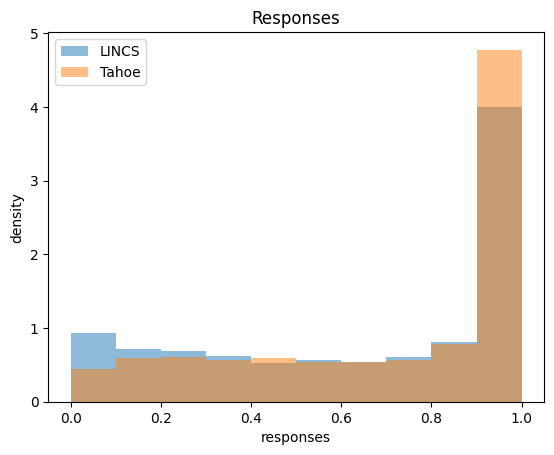

In [43]:
plt.hist(df_lincs['responses'], label='LINCS', alpha=0.5, density=True)
plt.hist(df_tahoe['responses'], label='Tahoe', alpha=0.5, density=True)
plt.xlabel('responses')

plt.ylabel('density')

plt.title('Responses')
plt.legend(loc='upper left')

## Doses

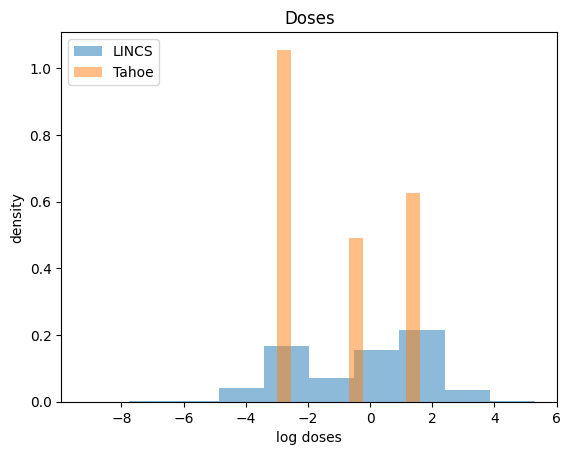

In [44]:
plt.hist(np.log(df_lincs['nearest_dose']), label='LINCS', alpha=0.5, density=True)
plt.hist(np.log(df_tahoe['dose']), label='Tahoe', alpha=0.5, density=True)
plt.legend()
plt.xlabel('log doses')

plt.ylabel('density')
plt.title('Doses')
plt.legend(loc='upper left')